In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(
    style="whitegrid",
    font_scale=1.25
)


ssc_data = pd.read_excel(
    "sameSexCoupleIndicator.xlsx",
    sheet_name=1,
    header=7,
    skipfooter=3
)

clean_data = pd.DataFrame(columns=["code", "name", "male couples", "female couples", "opposite-sex couples", "total couples"])
clean_data.set_index("code", inplace=True)

for i in ssc_data.index:
    string = ssc_data.at[i, "Suburb and Locality"]
    code = string.split(" ")[0]
    name = " ".join(string.split(" ")[1:])
    clean_data.loc[code] = [name] + ssc_data.loc[i, "Male same-sex couple":].tolist()

clean_data.to_csv("./gayBurbs.csv")
clean_data


,name,male couples,female couples,opposite-sex couples,total couples
code,,,,,
SAL10001,Aarons Pass,0,0,6,6
SAL10002,Abbotsbury,4,0,986,988
SAL10003,Abbotsford (NSW),7,16,1307,1328
SAL10004,Abercrombie,4,0,267,270
SAL10005,Abercrombie River,0,0,4,10
...,...,...,...,...,...
SAL90002,Home Island,0,0,111,111
SAL90003,Jervis Bay,0,0,40,40
SAL90004,Norfolk Island,6,3,449,453


count    13831.000000
mean         0.005523
std          0.016105
min          0.000000
25%          0.000000
50%          0.000000
75%          0.005645
max          0.333333
Name: same-sex couples, dtype: float64

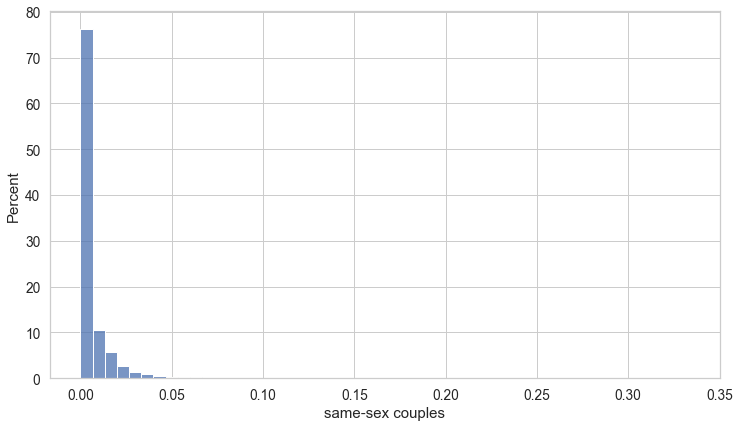

In [3]:
clean_data["same-sex couples"] = (clean_data["male couples"] + clean_data["female couples"]) / clean_data["total couples"]

fig, ax = plt.subplots(
    figsize=(12, 6.75)
)

sns.histplot(
    ax=ax,
    data=clean_data["same-sex couples"],
    bins=50,
    stat="percent"
)

clean_data["same-sex couples"].describe()